In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [214]:
df = pd.read_csv('datasets/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [216]:
# Boş veri tespiti:
for i in range(0, len(df.columns)):
    bosVeri = df[df.columns[i]].isnull().sum()
    print(f'"{df.columns[i]}" sutundaki bos veri sayisi: {bosVeri}')

"age" sutundaki bos veri sayisi: 0
"workclass" sutundaki bos veri sayisi: 0
"fnlwgt" sutundaki bos veri sayisi: 0
"education" sutundaki bos veri sayisi: 0
"educational-num" sutundaki bos veri sayisi: 0
"marital-status" sutundaki bos veri sayisi: 0
"occupation" sutundaki bos veri sayisi: 0
"relationship" sutundaki bos veri sayisi: 0
"race" sutundaki bos veri sayisi: 0
"gender" sutundaki bos veri sayisi: 0
"capital-gain" sutundaki bos veri sayisi: 0
"capital-loss" sutundaki bos veri sayisi: 0
"hours-per-week" sutundaki bos veri sayisi: 0
"native-country" sutundaki bos veri sayisi: 0
"income" sutundaki bos veri sayisi: 0


In [217]:
# Object veri tespiti:
objectVeriListesi = []
for j in range(len(df.columns)):
    if df[df.columns[j]].dtype == "O":
        objectVeriListesi.append(df[df.columns[j]].name)
        print("object veri sütunu: ", df[df.columns[j]].name)
print(f"Object Veri Listesi: {objectVeriListesi}")

object veri sütunu:  workclass
object veri sütunu:  education
object veri sütunu:  marital-status
object veri sütunu:  occupation
object veri sütunu:  relationship
object veri sütunu:  race
object veri sütunu:  gender
object veri sütunu:  native-country
object veri sütunu:  income
Object Veri Listesi: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [218]:
# Tüm object veri sütunlarındaki farklı verilerin detaylı listesi:
df[objectVeriListesi].value_counts()
for k in range(len(objectVeriListesi)):
    print(df[objectVeriListesi[k]].value_counts())
    print("\n\n")

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64



education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64



marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64



occupation
Prof-specialty       6172
Craft-repair         6112
Exec-manager

In [219]:
y_sutunu = 'income'
objectVeriListesi.remove(y_sutunu)
print(objectVeriListesi)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [220]:
# Kategorik verileri numerik verilere dönüştürme:
df = pd.get_dummies(df, columns=objectVeriListesi, drop_first=True)
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,>50K,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,>50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,30,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [221]:
y = df['income']
x = df.drop(['income'], axis=1)

In [222]:
knn = KNeighborsClassifier()
model = knn.fit(x,y)

In [223]:
model.score(x, y)

0.8397281028622906

In [227]:
skorListesi = []
for m in range(1, 15):
    knn2 = KNeighborsClassifier(n_neighbors=m)
    model2 = knn2.fit(x, y)
    skor = model2.score(x, y)
    skorListesi.append(skor)
    print(f"K = {m} için skor: {skor}")

skorListesi

K = 1 için skor: 0.9998976290897179
K = 2 için skor: 0.8768887432947053
K = 3 için skor: 0.8714835592318086
K = 4 için skor: 0.8429834978092625
K = 5 için skor: 0.8397281028622906
K = 6 için skor: 0.8272798001719831
K = 7 için skor: 0.8265222554358953
K = 8 için skor: 0.8199090946316695
K = 9 için skor: 0.8192334466238074
K = 10 için skor: 0.8149543425740142
K = 11 için skor: 0.8148929200278449
K = 12 için skor: 0.8116989476270423
K = 13 için skor: 0.8121698538143401
K = 14 için skor: 0.8098562712419639


[0.9998976290897179,
 0.8768887432947053,
 0.8714835592318086,
 0.8429834978092625,
 0.8397281028622906,
 0.8272798001719831,
 0.8265222554358953,
 0.8199090946316695,
 0.8192334466238074,
 0.8149543425740142,
 0.8148929200278449,
 0.8116989476270423,
 0.8121698538143401,
 0.8098562712419639]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


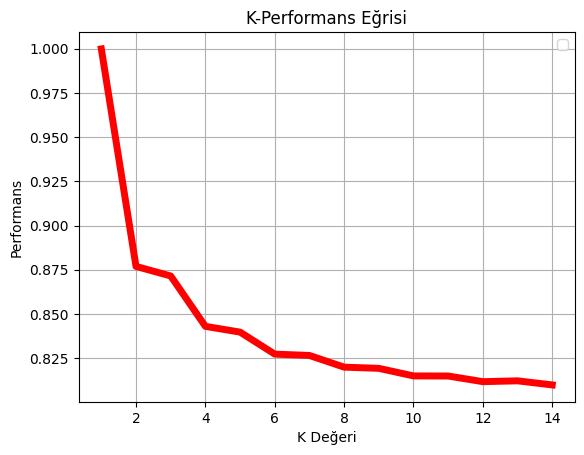

In [238]:
plt.plot(range(1,15), skorListesi, color='red', linewidth=5)
plt.xlabel('K Değeri')
plt.ylabel('Performans')
plt.title('K-Performans Eğrisi')
plt.legend()
plt.grid()